## False Discovery Rate Control and Variable Interaction 
Yu Jin
01/18/2024

In [87]:
import pandas as pd


In [88]:
import pandas as pd
data = pd.read_csv("file:///Users/yujin/Downloads/fundamentals%20(1).csv", index_col=0)
data = data.select_dtypes(exclude=['object'])
data

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6.000000e+06,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7.000000e+03,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,0.0,4.766731e+09,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5.000000e+06,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5.000000e+06,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,1.154000e+09,-262000000.0,5.000000e+06,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


## 1. Data Exploration and Visualization

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

Descriptive Stats:

In [90]:
data.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


Correlation Heatmap:

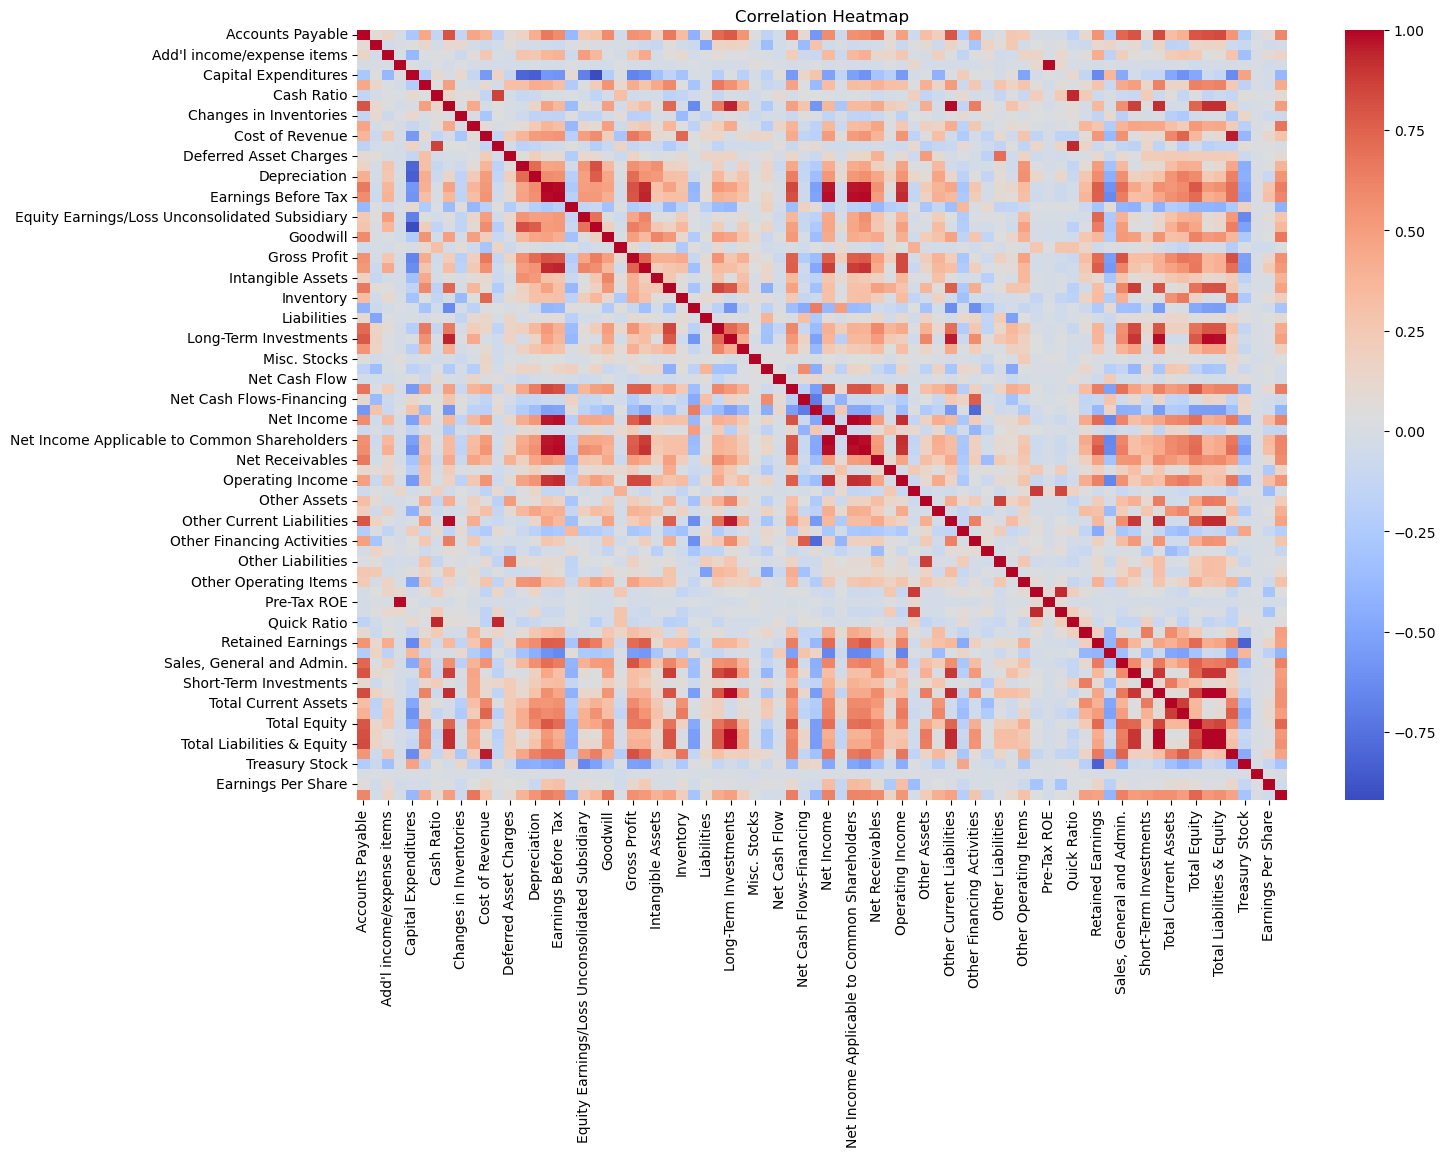

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2. Linear Regression Model Development

In [92]:
import statsmodels.api as sm

### Include all variables to generate full LM

In [93]:
data = data.dropna()
missing_values_count = data.isna().sum()

missing_percentage = (data.isna().sum() / len(data)) * 100
print(missing_values_count)
print(missing_percentage)

Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
After Tax ROE                   0
Capital Expenditures            0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 76, dtype: int64
Accounts Payable                0.0
Accounts Receivable             0.0
Add'l income/expense items      0.0
After Tax ROE                   0.0
Capital Expenditures            0.0
                               ... 
Total Revenue                   0.0
Treasury Stock                  0.0
For Year                        0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
Length: 76, dtype: float64


### 3. Analyze Multicollinearity and remove variables

In [94]:
#calculate Variance Inflation Factors (VIFs) for each variable

x = data.drop('Estimated Shares Outstanding', axis = 1)


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_no_const = pd.DataFrame()
vif_data_no_const['feature'] = x.columns
vif_data_no_const['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data_no_const


#list the vip that is larger than 5. and those variables should be dropped due to their high Multicollinearity with other variables
high_vif = vif_data_no_const[vif_data_no_const['VIF'] > 5]
if not high_vif.empty:
    print("Features with VIF greater than 5:")
    print(high_vif)
else:
    print("No features with VIF greater than 5.")



/Users/yujin/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with VIF greater than 5:
                       feature           VIF
0             Accounts Payable  2.692244e+10
1          Accounts Receivable  7.647771e+00
2   Add'l income/expense items  1.575624e+01
3                After Tax ROE  1.322678e+02
4         Capital Expenditures  5.555952e+05
..                         ...           ...
69           Total Liabilities           inf
70  Total Liabilities & Equity           inf
71               Total Revenue           inf
72              Treasury Stock  1.848818e+02
73                    For Year  1.952438e+01

[69 rows x 2 columns]


## 4. P-Value Analysis and Histogram

In [95]:
y = data[['Estimated Shares Outstanding']]
x = data.drop('Estimated Shares Outstanding', axis = 1)
x.shape


(1299, 75)

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                                  20:46:28   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025   

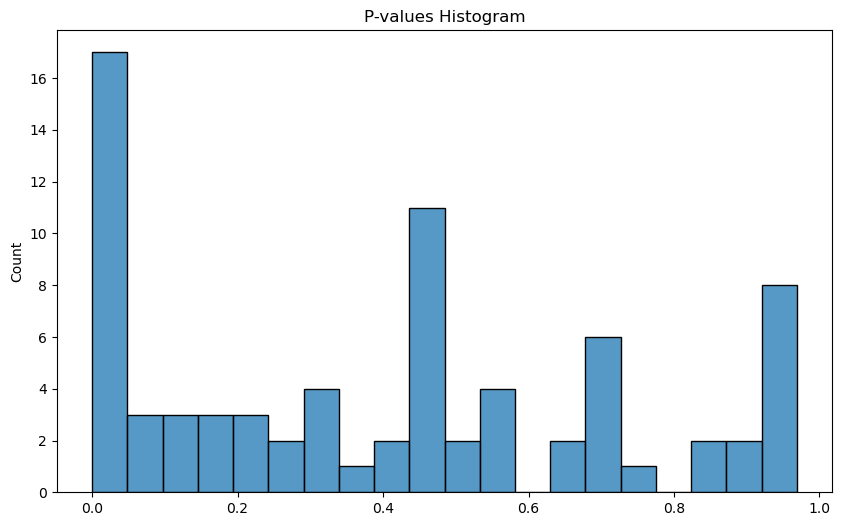

In [96]:




import statsmodels.api as sm

# Add a constant to X for the intercept
X_with_intercept = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression
print(results.summary())



plt.figure(figsize=(10, 6))
sns.histplot(results.pvalues, bins=20)
plt.title('P-values Histogram')
plt.show()

Skewedness: yes.

## 5. False Discovery Rate Control with BH Procedure

In [97]:
import numpy as np
#get p values from the model
pvals = results.pvalues

Alpha: 0.0016866310511582


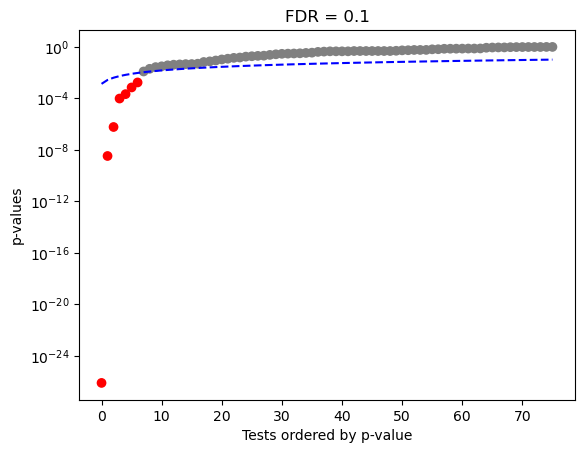

In [98]:
def fdr(pvals, q, plotit=True):
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(np.array(pvals)) #need to sort array, not just list
  N = len(sorted_pvals)
  k = np.arange(1, N+1) #array
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

  return alpha


alpha_threshold = fdr(pvals, 0.1, plotit=True)



In [99]:
true_discoveries = np.sum(pvals <= alpha_threshold)
print(true_discoveries)

7


6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables? 

Alpha: 0.0006898272344946772
Alpha: 0.0016866310511582
Alpha: 0.0016866310511582
Alpha: 0.026230280578051383
Alpha: 0.0731508235125983


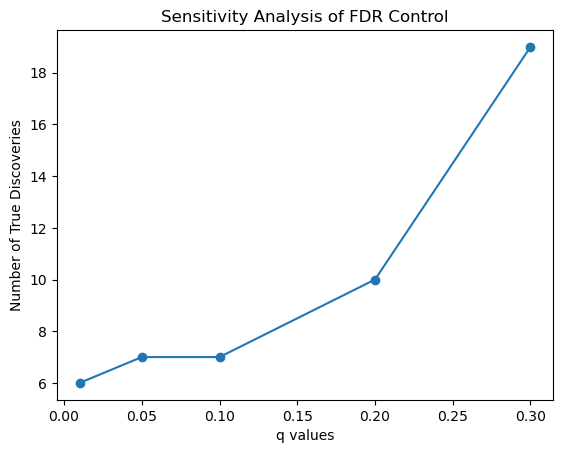

In [100]:
#'fdr' is FDR function
q_values = [0.01, 0.05, 0.1, 0.2, 0.3]
results = {}

for q in q_values:
    # Call the fdr function to get the alpha threshold for this q value
    alpha_threshold = fdr(pvals, q, plotit=False)

    # Calculate true discoveries for this alpha threshold
    true_discoveries = np.sum(pvals <= alpha_threshold)
    results[q] = true_discoveries

# Optional: Plotting the results
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('q values')
plt.ylabel('Number of True Discoveries')
plt.title('Sensitivity Analysis of FDR Control')
plt.show()


Applying the Benjamini-Hochberg (BH) procedure at different q values (where q is the maximum proportion of false discoveries or false positives that is considered acceptable) will yield different numbers of variables deemed significant. Here's what happens and what it indicates about the robustness of the significant variables:

Lower q-values (More stringent):

When you lower the q-value, the BH procedure becomes more stringent, leading to fewer variables being declared significant. This reduces the chance of false positives but increases the chance of false negatives (failing to identify true effects).

If many variables that were significant at a higher q-value are no longer significant at a lower q-value, this may indicate that the significance of those variables was marginal.

Higher q-values (Less stringent):

Increasing the q-value allows more variables to be deemed significant, accepting a higher rate of false discoveries. This can be useful if the cost of missing a true effect is high, but it risks including more false positives.

If the same variables remain significant across a range of higher q-values, this suggests that the evidence for their significance is robust.

What this tells you about the robustness of your significant variables:

Stability: Variables that remain significant across a wide range of q-values are more likely to be truly associated with the response variable. Their significance is robust to the stringency of the FDR control. Vulnerability to FDR: Variables that are only significant at higher q-values (i.e., less stringent control) might be more likely to be false discoveries. Their significance is more sensitive to the FDR threshold. Importance of Adjustment: The need for adjusting p-values in the presence of multiple testing is underscored. Without adjustment, you might falsely consider variables as having a significant impact when they do not. In practical terms, changing the q-value in the BH procedure helps balance the trade-off between discovering as many true effects as possible (statistical power) and limiting the proportion of false positives (statistical precision). Robust variables are those that consistently show significance despite the stringency of the FDR control, which is a desirable trait in variables considered for making decisions or building further models.

## 7. Exploring Interaction Terms

### Without interaction: first 25 variables

In [101]:
from sklearn.preprocessing import PolynomialFeatures

data2 = data.iloc[:,:25]
# Reset the index of both DataFrames if they are not aligned
data2 = data2.reset_index(drop=True)
# Now you can proceed to create interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(data2)
interaction_columns = poly.get_feature_names_out(input_features=data2.columns)
# Convert the interaction terms into a DataFrame
interaction_df = pd.DataFrame(interaction_terms, 
                              columns=poly.get_feature_names_out(input_features=data2.columns), 
                              index=data.index)
interaction_only_df = interaction_df.iloc[:, len(data2.columns):]
final_df = data.merge(interaction_df, left_index=True, right_index=True)
final_df

,Accounts Payable_x,Accounts Receivable_x,Add'l income/expense items_x,After Tax ROE_x,Capital Expenditures_x,Capital Surplus_x,Cash Ratio_x,Cash and Cash Equivalents_x,Changes in Inventories_x,Common Stocks_x,...,Goodwill Gross Margin,Goodwill Gross Profit,Goodwill Income Tax,Goodwill Intangible Assets,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,8.326480e+11,-3.300200e+10,5.040200e+10,-8.168564e+18,1.247536e+19,-4.944610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,2.410740e+11,6.424826e+19,-1.413756e+18,9.442746e+18,9.277160e+11,-2.041400e+10,1.363490e+11,-5.440504e+18,3.633816e+19,-7.996060e+17
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,2.577330e+11,1.105797e+20,1.350030e+18,9.163840e+18,1.702890e+12,2.079000e+10,1.411200e+11,8.919900e+18,6.054720e+19,7.392000e+17
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,2.986430e+11,1.222964e+20,-1.224845e+19,9.200659e+18,2.182262e+12,-2.185620e+11,1.641770e+11,-8.950264e+19,6.723161e+19,-6.733506e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.819450e+09,2.366559e+17,1.805867e+16,2.203441e+15,1.549018e+11,1.182020e+10,1.442250e+09,7.323881e+17,8.936285e+16,6.819073e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,1.835366e+11,8.624963e+18,5.536268e+17,1.517320e+18,2.504265e+11,1.607460e+10,4.405550e+10,7.553961e+17,2.070307e+18,1.328907e+17
1772,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,6.953940e+11,4.169582e+19,6.953940e+16,8.688749e+19,2.938040e+11,4.900000e+08,6.122410e+11,2.938040e+16,3.670997e+19,6.122410e+16
1777,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,6.186600e+10,2.839944e+18,1.836340e+17,7.885460e+17,1.821960e+11,1.178100e+10,5.058900e+10,5.408040e+17,2.322276e+18,1.501610e+17
1778,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,6.246400e+10,2.994368e+18,2.274080e+17,7.095520e+17,1.963520e+11,1.491200e+10,4.652800e+10,7.148440e+17,2.230436e+18,1.693910e+17


In [102]:
#Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding

import statsmodels.api as sm

# Add a constant to X to account for the intercept term
y_int = final_df['Estimated Shares Outstanding']
X_int = final_df.drop(['Estimated Shares Outstanding'], axis=1)

X_with_intercept = sm.add_constant(X_int)

# Fit the OLS model
model_int = sm.OLS(y_int, X_with_intercept)
results_int = model_int.fit()
# Output the summary of the regression
print(results_int.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.950
Model:                                      OLS   Adj. R-squared:                  0.934
Method:                           Least Squares   F-statistic:                     61.12
Date:                          Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                                  20:46:29   Log-Likelihood:                -26812.
No. Observations:                          1299   AIC:                         5.424e+04
Df Residuals:                               990   BIC:                         5.584e+04
Df Model:                                   308                                         
Covariance Type:                      nonrobust                                         
                                                                                      coef    std err         

###  b. Briefly explain why interaction terms might be important:


When the interaction between two variables are significant, then we don't really care to look at them individually if they are significant or not since the interaction effect is more important.

### c. Evaluate the performance of this new model with interaction terms.

The F statistics become smaller after interaction terms are addedin. However, the P value for both model are still significant which are zero.

The model with interaction is a better fit due to higher r squared and lower examining AIC values.


## 8. Model Evaluation with Interaction Terms

In [103]:
#Adj. R-squared for the new	model is 0.914 which is better than the old model without interaction. new	model has a better prediction power.

### d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

## 9. FDR Analysis with Interaction Terms

### a. Create a histogram of the p-values for the new model including interaction terms.

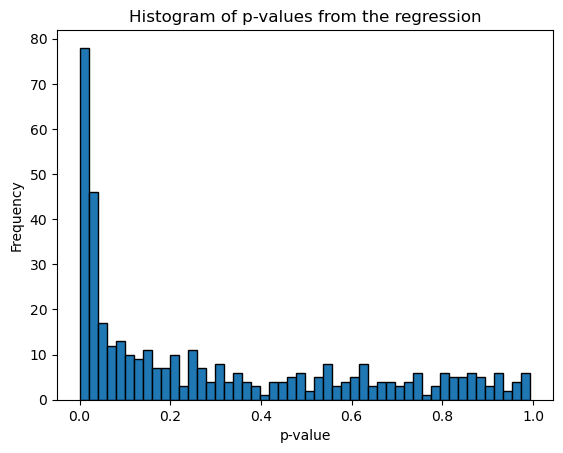

In [104]:
import matplotlib.pyplot as plt

# Extract p-values from the regression results
p_values_int = results_int.pvalues

# Create a histogram of the p-values
plt.hist(p_values_int, bins=50, edgecolor='black')
plt.title('Histogram of p-values from the regression')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

### b. Apply the Benjamini-Hochberg (BH) procedure

In [105]:
import numpy as np

# Sample p-values array, replace it with your actual p-values

# Number of tests
m = len(p_values_int)

# Desired false discovery rate
q = 0.1

# Sort p-values and compute critical BH threshold
sorted_p_values = np.sort(p_values_int)
critical_values = [q * (i+1) / m for i in range(m)]

# Find the largest p-value that is smaller than the BH critical value
significant_p_values_mask = sorted_p_values <= critical_values
max_index = np.where(significant_p_values_mask)[0].max() if significant_p_values_mask.any() else 0
significant_p_values = sorted_p_values[:max_index+1]

# Estimate the number of true discoveries
num_true_discoveries = len(significant_p_values)
num_true_discoveries

109

### c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR.

Alpha: 0.0006457085077638588
Alpha: 0.006481013764592458
Alpha: 0.026713762456471894
Alpha: 0.0741302155532873
Alpha: 0.13480739131796513


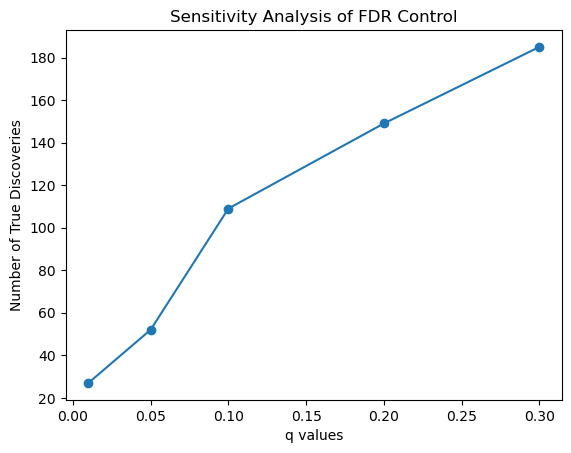

In [106]:
# Assuming 'model_pvals' contains the p-values from your OLS model and 'fdr_bh' is your FDR function
q_values = [0.01, 0.05, 0.1, 0.2, 0.3]
results = {}

for q in q_values:
    # Call the fdr function to get the alpha threshold for this q value
    alpha_threshold = fdr(sorted_p_values , q, plotit=False)

    # Calculate true discoveries for this alpha threshold
    true_discoveries = np.sum(sorted_p_values <= alpha_threshold)
    results[q] = true_discoveries

# Optional: Plotting the results
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('q values')
plt.ylabel('Number of True Discoveries')
plt.title('Sensitivity Analysis of FDR Control')
plt.show()



Alpha: 0.026713762456471894


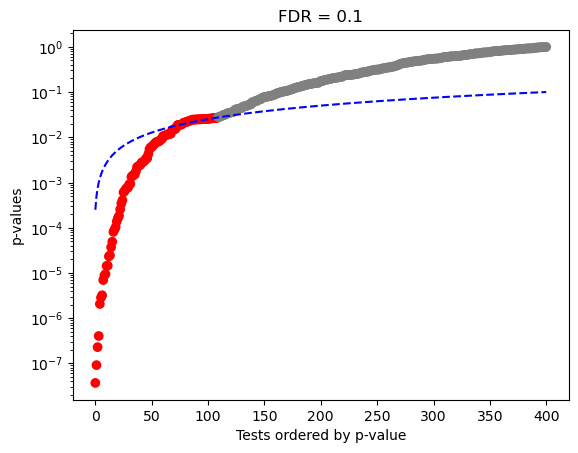

0.026713762456471894

In [107]:
fdr(results_int.pvalues, q = 0.1, plotit = True)



THE impact of control of the FDR between models with and without interaction are low.